In [6]:
import random
import utils
import numpy as np
import matplotlib.pyplot as plt
from Game.LeducGame import *
from Environment.Environment import *
from Opponent_agent.RandAgent import *
from Opponent_agent.GreedyAgent import *
from Opponent_agent.HumanAgent import *
from Qagent.QAgent import *

stack_size=5
random_agent_qtable=None
greedy_agent_qtable=None

# Training and Testing parameters

In [7]:
epochs_number=100000
evaluate_every=5000
test_number=10000

## qAgent vs RandAgent

In [8]:
greedy=GreedyAgent()
env=Environment(greedy)
envTest=Environment(greedy)
qagent=QAgent()


for i in range(epochs_number):  
    
    #TRAIN
    #print("NEWWWWWW")
    while(env.game.epoch_is_over==0):
        
        current_player=env.game.get_firstplayer()
        stack1=env.game.stack1
        stack2=env.game.stack2
        #print("stack1: ", stack1)
        #print("stack2: ", stack2)
        if(env.game.stack1<= env.game.stack2):
            small_stack=env.game.stack1
        else:
            small_stack=env.game.stack2
        #print("small_stack: ", small_stack)    
        

        allowed_actions=[0,1,2]
        if(current_player==1):
            env.agent.set_action(allowed_actions,None,env.game.get_game_round(), env.game.get_hand_player2(),env.game.get_boardcard())
            env.set_opponent_action(env.agent.get_action())
            reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action(), small_stack)
            
            #print("opponent action: ", env.agent.get_action())

        while(env.game.is_game_over()==0):
            #print("\n NEW ")
            #print("qagent card: ", env.game.hand_player1)
            #print("board action: ", env.game.boardcard)
            #print("round : ", env.game.game_round)
            state=env.get_state()
            qagent.set_state(state)
            #print("State= ",state)
            qagent_action=qagent.explore_action(allowed_actions)
            #print("qagent action: ", qagent_action)

            reward,allowed_actions, new_state=env.step(qagent_action, small_stack)
            

            if(env.game.is_game_over()==1):
                #print("results: ",env.game.result)
                qagent.update(reward, env.get_actions_hist(),stack1,stack2)
                
        env.reset_card()
        state=env.get_state()
        qagent.set_state(state)

    env.reset()
    state=env.get_state()
    qagent.set_state(state)

with np.printoptions(precision=3, suppress=True):
    print(qagent.qtable)
random_agent_qtable=qagent.qtable

[[[-1.     1.     0.288]
  [-1.     1.     0.44 ]
  [-1.     1.     0.631]
  [-1.     1.     0.382]
  [-1.     1.     0.492]
  [-1.     1.     0.56 ]
  [-1.     0.    -0.299]
  [-1.     0.    -0.702]
  [-1.     0.     0.352]
  [-1.     1.     1.   ]
  [-1.     0.234  0.064]
  [-1.    -0.095  0.419]
  [-1.     0.147  0.486]
  [-1.     1.     1.   ]
  [-1.     0.858  0.484]
  [-1.     0.798  0.902]
  [-1.     0.675  0.394]
  [-1.     1.     1.   ]
  [-0.998  0.994  0.996]
  [-1.    -0.773  0.387]
  [-0.998 -0.783  0.999]
  [-1.    -0.384  0.35 ]
  [-0.985  0.995  0.984]
  [-0.998  0.764  0.998]
  [-1.     0.676  0.747]
  [-0.998  0.499  0.428]
  [-0.953  0.987  0.966]
  [-0.958  0.     0.935]
  [-1.     0.    -1.   ]
  [-1.     0.    -1.   ]
  [-1.     0.    -0.912]
  [-0.746  0.     0.651]
  [-1.     0.    -0.875]
  [-1.     0.    -0.607]
  [-1.     0.    -0.932]
  [-0.718  0.     0.878]]

 [[-1.     1.967 -0.708]
  [-1.     1.925  0.875]
  [-1.     1.959  0.668]
  [-1.     1.812  0.462

In [16]:
with np.printoptions(precision=3, suppress=True):
    print(qagent.qtable[1])

[[-1.     1.967 -0.708]
 [-1.     1.925  0.875]
 [-1.     1.959  0.668]
 [-1.     1.812  0.462]
 [-1.     1.891  0.441]
 [-1.     1.822  0.832]
 [-1.     0.    -1.081]
 [-1.     0.    -0.709]
 [-1.     0.     0.964]
 [-1.     1.174  1.279]
 [-1.     0.505  0.196]
 [-1.     0.12  -0.304]
 [-1.     0.352 -0.632]
 [-1.     1.064  1.037]
 [-1.     1.04   0.566]
 [-1.     0.98  -0.057]
 [-1.     0.8    0.215]
 [-1.     1.     1.   ]
 [-1.     1.     1.129]
 [-1.    -0.842  0.472]
 [-1.    -0.909  1.   ]
 [-1.    -0.597  0.283]
 [-1.     1.     1.042]
 [-1.     0.514  1.   ]
 [-1.     0.672  0.913]
 [-1.     0.33   0.762]
 [-1.     1.     1.   ]
 [-0.999  0.     1.994]
 [-1.     0.    -2.   ]
 [-1.     0.    -2.   ]
 [-1.     0.    -1.881]
 [-0.891  0.     1.757]
 [-1.     0.    -1.41 ]
 [-1.     0.    -1.262]
 [-1.     0.    -1.734]
 [-0.953  0.     1.915]]


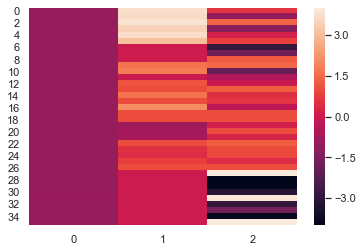

In [14]:
import seaborn as sns; sns.set()

ax = sns.heatmap(qagent.qtable[5])

In [ ]:
import seaborn as sns; sns.set()
for i in range(9):
    ax = sns.heatmap(qagent.qtable[i])

In [ ]:
ax = sns.heatmap(qagent.qtable[1])

## qAgent vs GreedyAgent

In [ ]:
greedy=GreedyAgent()
env=Environment(greedy)
envTest=Environment(greedy)
qagent=QAgent()


for i in range(epochs_number):

    #TEST
    if(i % evaluate_every == 0):
        perf=0
        for j in range(test_number):
            envTest.reset()
            current_player=envTest.game.get_firstplayer()
            allowed_actions=[0,1,2]
            if(current_player==1):
                envTest.agent.set_action(allowed_actions,None,envTest.game.get_game_round(), envTest.game.get_hand_player2(),envTest.game.get_boardcard())
                envTest.set_opponent_action(envTest.agent.get_action())
                reward,current_player,allowed_actions=envTest.game.step_prime(envTest.agent.get_action())

            while(envTest.game.is_game_over()==0):
                state=envTest.get_state()
                qagent.set_state(state)
                qagent_action=qagent.exploit_action(allowed_actions)
                reward,allowed_actions, new_state=envTest.step(qagent_action)

            if(envTest.game.is_game_over()==1):
                perf=perf+reward
        qagent.set_perf(float(perf)/test_number)    
    
    #TRAIN
    current_player=env.game.get_firstplayer()
    allowed_actions=[0,1,2]
    if(current_player==1):
        env.agent.set_action(allowed_actions,None,env.game.get_game_round(), env.game.get_hand_player2(),env.game.get_boardcard())
        env.set_opponent_action(env.agent.get_action())
        reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action())

    while(env.game.is_game_over()==0):
        state=env.get_state()
        qagent.set_state(state)
        qagent_action=qagent.explore_action(allowed_actions)
        reward,allowed_actions, new_state=env.step(qagent_action)

        if(env.game.is_game_over()==1):
            qagent.update(reward, env.get_actions_hist())
    
    env.reset()
    state=env.get_state()
    qagent.set_state(state)

with np.printoptions(precision=3, suppress=True):
    print(qagent.qtable)
random_agent_qtable=qagent.qtable

In [ ]:
plt.plot(qagent.perf)

## qAgent (trained with a random agent) vs HumanAgent

In [ ]:
humanAgent=HumanAgent()
env=Environment(humanAgent)
qagent=QAgent()
qagent.set_qtable(random_agent_qtable)

print("How to play?\n\nFor the actions:\n\t- 0 : Fold\n\t- 1 : Check\n\t- 2 : Push\n\nFor the cards:\n\t- 0 : Jack\n\t- 1 : Queen\n\t- 2 : King\n\n ")
for i in range(1):
    allowed_actions=[0,1,2]
    current_player=env.game.get_firstplayer()
    while(env.game.is_game_over()==0):
        state=env.get_state()
        qagent.set_state(state)
        
        if (current_player==1):
            env.agent.set_action(allowed_actions,None, env.game.get_game_round(), env.game.get_hand_player2(),env.game.get_boardcard())
            env.set_opponent_action(env.agent.get_action())
            reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action())
            if(env.game.is_game_over()==1):
                print("You loose!! He has a:", env.game.get_hand_player1(), "\n\n")
        if(env.game.is_game_over()==0):
            state=env.get_state()
            qagent.set_state(state)
            qagent_action=qagent.exploit_action(allowed_actions)
            reward,allowed_actions, new_state=env.step(qagent_action)
            if(env.game.is_game_over()==1):
                if(reward<0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nCongratulation, you win !!!\n\n" )
                elif(reward>0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nSorry, you loose !!!\n\n" )
                elif(reward==0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nIt's a draw !!!\n\n" )
                qagent.update(reward, env.get_actions_hist())
            qagent.set_state(new_state)

    
    env.reset()
    

## qAgent (trained with a greedy agent) vs HumanAgent

In [ ]:
humanAgent=HumanAgent()
env=Environment(humanAgent)
qagent=QAgent()
qagent.set_qtable(greedy_agent_qtable)

    
print("How to play?\n\nFor the actions:\n\t- 0 : Fold\n\t- 1 : Check\n\t- 2 : Push\n\nFor the cards:\n\t- 0 : Jack\n\t- 1 : Queen\n\t- 2 : King\n\n ")
for i in range(1):
    allowed_actions=[0,1,2]
    current_player=env.game.get_firstplayer()
    while(env.game.is_game_over()==0):
        state=env.get_state()
        qagent.set_state(state)
        
        if (current_player==1):
            env.agent.set_action(allowed_actions,None, env.game.get_game_round(), env.game.get_hand_player2(),env.game.get_boardcard())
            env.set_opponent_action(env.agent.get_action())
            reward,current_player,allowed_actions=env.game.step_prime(env.agent.get_action())
            if(env.game.is_game_over()==1):
                print("You loose!! He has a:", env.game.get_hand_player1(), "\n\n")
        if(env.game.is_game_over()==0):
            state=env.get_state()
            qagent.set_state(state)
            qagent_action=qagent.exploit_action(allowed_actions)
            reward,allowed_actions, new_state=env.step(qagent_action)
            if(env.game.is_game_over()==1):
                if(reward<0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nCongratulation, you win !!!\n\n" )
                elif(reward>0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nSorry, you loose !!!\n\n" )
                elif(reward==0):
                    print("His action was: ", qagent_action, "\nHe has a: ",env.game.get_hand_player1(), "\nIt's a draw !!!\n\n" )
                qagent.update(reward, env.get_actions_hist())
            qagent.set_state(new_state)

    
    env.reset()
    

In [ ]:
game = LeducGame()
print(game)
game.step_prime(1)
print(game)
game.step_prime(1)
print(game)
game.step_prime(1)
print(game)
game.step_prime(2)
print(game)
game.step_prime(2)
print(game)

In [ ]:
qtable={[np.zeros((2,3)), np.zeros((2,3))]}
print(qtable)

In [ ]:
x = np.zeros((5,2,3)) # Make a 10 by 20 by 30 array
x[2][0][0]=11

In [ ]:
print(x)

In [ ]:
print(x[2])